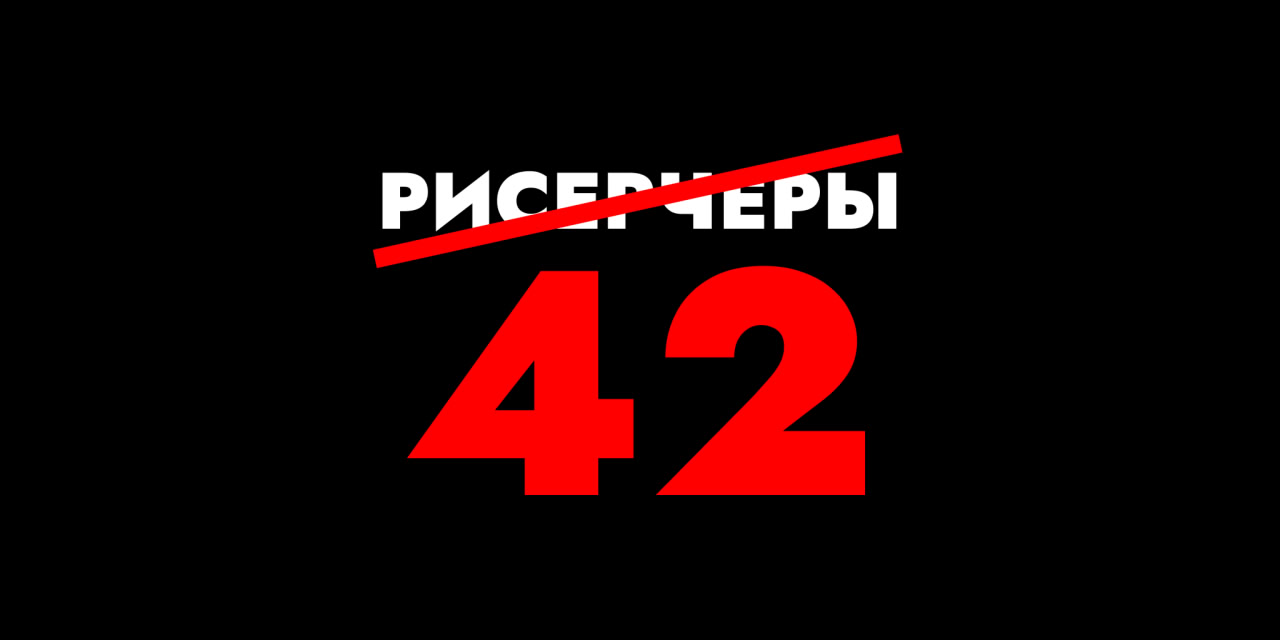

# **ARTEM GOROKHOV**

## Rules

1. All mathematical expressions should be written in **LaTeX** for better clarity and formatting.
2. Ensure that the entire notebook can execute seamlessly from start to finish without encountering errors.
3. Focus on optimizing the runtime of the code wherever possible to enhance performance.

## Notation

- $c$: The optimal constant model.  
- $y_i$: The target values in the dataset.  
- $w_i$: The weights associated with the loss function.
- $q$: Quantile value in range $[0, 1]$.

# Важно! О формате сдачи

* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения (или аналитического решения - в зависимости от задачи) обязательно. Письменные ответы на вопросы без сопутствующего кода/аналитического решения оцениваются в 0 баллов.**

## Problem 1

### Description

Consider the loss function:

\begin{align}
L = \sum w_i \cdot \left( \log(y_i) - \log(c) \right)^2
\end{align}

where:

- $\sum w_i = 1$

#### Tasks

1. **Analytically find the best constant $c$** for the given loss function.
2. **Determine the name of the aggregation of $y_i$'s** at the end if $w_1 = w_2 = \dots = w_n$.

### Solution

\begin{align}

\sum_{i}^{n} w_i = 1 \newline

L = \sum_{i}^{n} w_i \cdot \left( \log_a(y_i) - \log_a(c) \right)^2 \rightarrow \min_c \enspace \Longrightarrow \enspace \frac{dL}{dc} = 0 \newline

\frac{dL}{dc} = \frac{d}{dc} \sum_{i}^{n} w_i \cdot \left( \log_a(y_i) - \log_a(c) \right)^2 = \frac{2}{c \cdot \ln(a)} \sum_{i}^{n} w_i \cdot \left( \log_a(c) - \log_a(y_i) \right) = 0 \newline

\textrm{Since} \enspace c \neq 0: \quad \sum_{i}^{n} w_i \cdot \left( \log_a(c) - \log_a(y_i) \right) = 0 \newline

\sum_{i}^{n} w_i \cdot \log_a(c) = \sum_{i}^{n} w_i \cdot \log_a(y_i) \newline

\log_a(c) = \frac{\sum_{i}^{n} w_i \cdot \log_a(y_i)}{\sum_{i}^{n} w_i} = \sum_{i}^{n} w_i \cdot \log_a(y_i) \newline

c = a^{\sum_{i}^{n} w_i \cdot \log_a(y_i)} = \prod_{i}^{n} a^{w_i \cdot \log_a(y_i)} = \prod_{i}^{n} {y_i}^{w_i} \newline

\textrm{if} \enspace w_1 = w_2 = ... = w_n: \quad c = \prod_{i}^{n} {y_i}^{\frac{1}{n}} = \sqrt[n]{\prod_{i}^{n} y_i} \enspace - \enspace \textrm{geometric mean}

\end{align}


---

### Final Answer

1. $\quad c = \prod_{i}^{n} {y_i}^{w_i}$

2. $\quad \textrm{if} \enspace w_1 = w_2 = ... = w_n: \quad c = \sqrt[n]{\prod_{i}^{n} y_i} \enspace - \enspace \textrm{geometric mean}$

## Problem 2

### Description

Consider the **quantile loss function** $L$, and prove that the optimal constant $c$ corresponds to the quantile $q$ of the data $y_1, \dots, y_n$.

The quantile loss function is defined as:

\begin{align}
L =
\begin{cases}
q \cdot (y_i - c), & \text{if } y_i \geq c \\
(1-q) \cdot (c - y_i), & \text{if } y_i < c
\end{cases}
\end{align}

**Hint**:

Proof for optimal MAE constant on [this page](https://ds100.org/course-notes/constant_model_loss_transformations/loss_transformations.html).



### Solution

\begin{align}

L = \sum_{i}^{n} 
\begin{cases}
q \cdot (y_i - c), & \textrm{if } y_i \geq c \\
(1-q) \cdot (c - y_i), & \textrm{if } y_i < c
\end{cases}
\rightarrow \min_c \enspace \Longrightarrow \enspace \frac{dL}{dc} = 0 \newline

\frac{dL}{dc} \quad = \quad \frac{d}{dc} \sum_{i}^{n} 
\begin{cases}
q \cdot (y_i - c), & \textrm{if } y_i \geq c \\
(1-q) \cdot (c - y_i), & \textrm{if } y_i < c
\end{cases}
\quad = \quad \sum_{i}^{n} 
\begin{cases}
\frac{d}{dc} q \cdot (y_i - c), & \textrm{if } y_i \geq c \\
\frac{d}{dc} (1-q) \cdot (c - y_i), & \textrm{if } y_i < c
\end{cases}
\quad = \quad \sum_{i}^{n} 
\begin{cases}
-q, & \textrm{if } y_i \geq c \\
1-q, & \textrm{if } y_i < c
\end{cases}
\quad = \quad 0 \newline

\sum_{i}^{n} 
\begin{cases}
q, & \textrm{if } y_i \geq c \\
0, & \textrm{if } y_i < c
\end{cases}
\quad = \quad \sum_{i}^{n} 
\begin{cases}
1 - q, & \textrm{if } y_i < c \\
0, & \textrm{if } y_i \geq c
\end{cases} \newline

q \cdot \sum_{i}^{n} \mathbb{I} [y_i \geq c] = (1 - q) \cdot \sum_{i}^{n} \mathbb{I} [y_i < c] \newline

q \cdot \sum_{i}^{n} (\mathbb{I} [y_i \geq c] + \mathbb{I} [y_i < c]) = \sum_{i}^{n} \mathbb{I} [y_i < c] \newline

q \cdot n = \sum_{i}^{n} \mathbb{I} [y_i < c] \newline

q = \frac{1}{n} \cdot \sum_{i}^{n} \mathbb{I} [c > y_i] \enspace - \enspace \textrm{quantile of } c \textrm{ in the data } y_1, y_2, ..., y_n

\end{align}

---

### Final Answer

Proved.


## Problem 3

In [11]:
import numpy as np

def bruteforce_constant(y: np.ndarray, loss_func: callable, tol: float) -> float:
    """
    Finds the optimal constant c by brute force using a specified loss function.

    Parameters:
    y (np.ndarray): Array of target values.
    loss_func (callable): A function that computes the loss given y and c.
    tol (float): The step size for generating potential c values between min(y) and max(y).

    Returns:
    float: The optimal constant c that minimizes the loss.
    """

    c = np.arange(y.min(), y.max() + tol, tol)
    loss = np.array([loss_func(y, c_i) for c_i in c])
    best_c = c[loss.argmin()]

    return best_c

# Define the loss function
def loss(y, c):
    return np.sum(np.log(np.cosh(y - c)))

# Example usage of the function
y = np.array([1, 2, 3, 4, 55, 99, 100])
optimal_c = bruteforce_constant(y, loss, tol=0.001)
min_loss = loss(y, optimal_c)
print(f"The optimal constant c is: {optimal_c}")
print(f"The minimum loss is: {min_loss}")

The optimal constant c is: 4.1969999999996475
The minimum loss is: 243.96167948452023


## Problem 4

In [6]:
from scipy.optimize import minimize
import numpy as np

def minimize_constant(y: np.ndarray, loss_func: callable, tol: float) -> float:
    """
    Finds the optimal constant c using scipy's minimize function with a specified loss function.

    Parameters:
    y (np.ndarray): Array of target values.
    loss_func (callable): A function that computes the loss given y and c.
    tol (float): The tolerance for the optimization process.

    Returns:
    float: The optimal constant c that minimizes the loss.
    """
    
    result = minimize(lambda x: loss_func(y, x), y.mean(), method="BFGS")

    return result.x[0]

# Define the loss function
def loss(y, c):
    return np.sum(np.log(np.cosh(y - c)))

# Example usage of the function
y = np.array([1, 2, 3, 4, 55, 99, 100])
optimal_c = minimize_constant(y, loss, tol=0.001)
min_loss = loss(y, optimal_c)
print(f"The optimal constant c is: {optimal_c}")
print(f"The minimum loss is: {min_loss}")

The optimal constant c is: 4.197385846917552
The minimum loss is: 243.96167938592583


# Problem 5

## Description
In a multiclass classification problem, we often compare a model’s performance with a simple baseline. Two baseline approaches are:

1. **Always predict the most frequent class** (also known as the “constant baseline”).  
2. **Randomly sample a class** for every object with probabilities proportional to the class frequencies in the training set.

The goal of this task is to determine which of these two approaches yields a higher **Accuracy** on a given dataset.

You are provided with:  
1. A set of objects \\( X \\) and their true class labels \\( y \\), where \\( y \in \{C_1, C_2, \dots, C_k\} \\).  
2. The frequencies (or proportions) of each class in the training data.

You need to:  
1. **Explain** how to implement these two baseline approaches (always predicting the most frequent class vs. sampling a class according to its frequency).  
2. **Calculate** the expected Accuracy for each approach.  
3. **Compare** the results to determine which method is more likely to produce a higher Accuracy.

## Solution

### **I. Implementation.**

**(A) Always predicting the most frequent class.**
1. Find value counts of all the classes across class labels of the set of objects.
2. Identify the most popular class.
3. Predict the most popular class for all the objects.

You can see my implementation below.

In [35]:
import numpy as np

class MostFrequentClassifier:
    def __init__(self):
        self.most_frequent_class = None

    def fit(self, X, y):
        value_counts = {}
        for c in y:
            if c in list(value_counts.keys()):
                value_counts[c] += 1
            else:
                value_counts[c] = 1
        
        self.most_frequent_class = list(value_counts.keys())[0]
        for c in list(value_counts.keys()):
            if value_counts[c] > value_counts[self.most_frequent_class]:
                self.most_frequent_class = c
    
    def predict(self, X):
        return np.array([self.most_frequent_class for i in X])

n_classes = 5
dataset_size = 10000

X = np.random.rand(dataset_size)
y = np.random.choice(n_classes, dataset_size)

classifier = MostFrequentClassifier()
classifier.fit(X, y)
preds = classifier.predict(X)

print(preds)

[3 3 3 ... 3 3 3]


**(B) Randomly sampling a class with probabilities proportional to class frequencies.**

1. Find value counts of all the classes across class labels of the set of objects.
2. Transform classes value counts to their probabilities by dividing them by number of objects in the set.
3. For each object, randomly select a class based on the computed probabilities.

You can see my implementation below.

In [37]:
import numpy as np

class RandomSamplerClassifier:
    def __init__(self):
        self.classes = []
        self.class_probabilities = []
    
    def fit(self, X, y):
        class_counts = []
        for c in y:
            if c in self.classes:
                class_counts[self.classes.index(c)] += 1
            else:
                self.classes.append(c)
                class_counts.append(1)
        
        for c in class_counts:
            self.class_probabilities.append(c / len(X))
    
    def predict(self, X):
        return np.random.choice(self.classes, size=len(X), p=self.class_probabilities)

n_classes = 5
dataset_size = 10000

X = np.random.rand(dataset_size)
y = np.random.choice(n_classes, dataset_size)

classifier = RandomSamplerClassifier()
classifier.fit(X, y)
preds = classifier.predict(X)

print(preds)

[3 0 2 ... 4 0 2]


### **II. Calculation.**

\begin{align*}

\textrm{]} \enspace C = \{C_1, C_2, ..., C_k\} \newline

\textrm{]} \enspace F = \{f_1, f_2, ..., f_k\} \enspace - \enspace \textrm{frequencies of classes} \enspace C_1, C_2, ..., C_k \newline

\textrm{]} \enspace \textrm{Random}(C, F) \enspace - \enspace \textrm{random class choice from classes set C with given probabilities F} \newline

\textrm{]} \enspace A = \textrm{Accuracy score} = \frac{1}{n} \sum_{i}^{n} \mathbb{I} [y_i = \hat{y}_i]

\end{align*}

**(A) Always predicting the most frequent class.**

\begin{align*}

\forall i \quad \hat{y}_i = C_{\textrm{most frequent}} \newline

A_{\textrm{expected}} = \frac{1}{n} \sum_{i}^{n} \mathbb{I} [y_i = C_{\textrm{most frequent}}] = \frac{1}{n} \sum_{i}^{k} f_i \cdot n \cdot \mathbb{I} [C_i = C_{\textrm{most frequent}}] = f_{\textrm{most frequent}}

\end{align*}

**(B) Randomly sampling a class with probabilities proportional to class frequencies.**

\begin{align*}

\forall i \quad \hat{y}_i = \textrm{Random}(C, F) \newline

A_{\textrm{expected}} = \frac{1}{n} \sum_{i}^{n} \mathbb{I} [y_i = \textrm{Random}(C, F)] = \frac{1}{n} \sum_{i}^{k} \sum_{j}^{f_i \cdot n} \mathbb{I} [C_i = \textrm{Random}(C, F)] = \sum_{i}^{k} \frac{f_i}{n} \sum_{j}^{n} \mathbb{I} [C_i = \textrm{Random}(C, F)] = \sum_{i}^{k} f_i \cdot \mathbb{E} [C_i = \textrm{Random}(C, F)] = \sum_{i}^{k} {f_i}^2

\end{align*}

### **III. Comparison.**

\begin{align*}

\textrm{]} \enspace C_{\textrm{most frequent}} = C_1 \newline

\forall i \quad f_1 \geq f_i \newline

\forall i \quad f_1 \cdot f_i \geq {f_i}^2 \newline

f_1 \cdot \sum_{i}^{k} f_i \geq \sum_{i}^{k} {f_i}^2 \newline

f_1 \geq \sum_{i}^{k} {f_i}^2 \newline

f_{\textrm{most frequent}} \geq \sum_{i}^{k} {f_i}^2 \newline

A_{\textrm{expected, most frequent strategy}} \geq A_{\textrm{expected, random sampling strategy}}

\end{align*}


### Final answer

1. _See the explanation and implementation above._

    The main difference in their realization is that the most frequent class predictor assigns the single most common class to every instance, whereas the random sampler assigns each instance a class by randomly selecting based on the classes’ relative frequencies in the training data.

2. 
    $\textrm{Accuracy}_{\textrm{expected, most frequent strategy}} = f_{\textrm{most frequent}};$

    $\textrm{Accuracy}_{\textrm{expected, random sampling strategy}} = \sum_{i}^{k} {f_i}^2$.

3. Always predicting the most frequent class is more likely to produce a higher Accuracy score than randomly sampling a class according to its frequency.